# 양방향 LSTM (BiLSTM)


RNN이나 LSTM은 일반 신경망과 다르게 시퀀스 또는 시계열 데이터 처리에 특화되어 은닉층에서 과거의 정보를 기억할 수 있다. 그러나 순환 신경망의 구조적 특성상 데이터가 입력 순으로 처리되기 때문에 이전 시점의 정보만 활용할 수 밖에 없다는 단점이 존재한다. 문장이 길어질수록 성능이 저하된다. 예를 들어 다음과 같은 예문이 있다.



*   쟈니스 소속 __로는 아라시가 있다.

아라시와 쟈니스를 아는 사람은 어렵지 않게 빈칸에 들어가는 단어를 유추할 수 있다. 하지만 일반적인 RNN이나 LSTM에서는 "쟈니스" "소속"이라는 단어만 가지고 빈칸에 들어갈 "가수"라는 단어를 유추하기엔 정보가 매우 부족하다. 이렇듯 자연어 처리에 있어 입력 데이터의 정방향 처리만큼 역방향 처리도 중요하다. **양방향 LSTM(Bidirectional LSTM)은 기존 LSTM 계층에 역방향으로 처리하는 LSTM 계층을 하나 더 추가해 양방향에서 문장의 패턴을 분석할 수 있도록 구성된다**. 입력 문장을 양방향에서 처리하므로 시퀀스 길이가 길어진다 하더라도 정보 손실 없이 처리가 가능하다.

다음은 양방향 LSTM의 구조를 설명하는 그림이다. 정방향 LSTM은 기존과 동일하게 입력 문장을 왼쪽에서 오른쪽으로 처리하며, 역방향 LSTM은 입력 문장의 단어 순서를 반대로 처리한다.


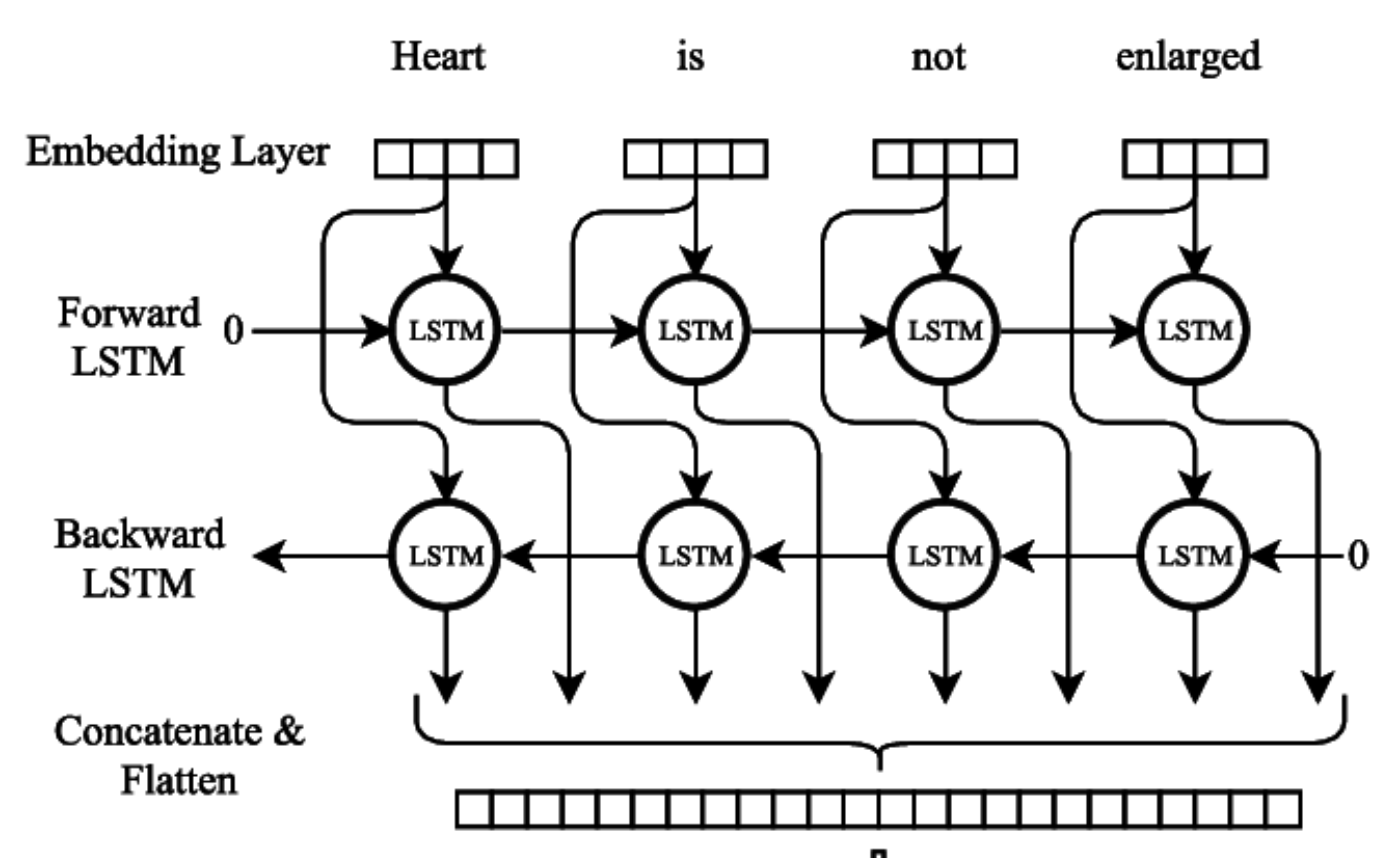

이를 바탕으로 랜덤으로 시퀀스를 생성해 임의의 분류 기준에 맞는 클래스를 에측하는 양방향 LSTM 모델 예제이다.

In [22]:
import numpy as np
from random import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, TimeDistributed

In [23]:
# 시퀀스 생성
def get_sequence(n_timesteps):
  # 0~1 사이의 랜덤 시퀀스 생성
  X = np.array([random() for _ in range(n_timesteps)])

  # 클래스 분류 기준
  limit = n_timesteps /4.0
  
  # 누적합 시퀀스에서 클래스 결정
  # 누적합 항목이 limit보다 작은 경우 0, 아닌 경우 1로 분류
  y = np.array([0 if x <limit else 1 for x in np.cumsum(X)])
  
  # LSTM 입력을 위해 3차원 텐서 형태로 변경
  X = X.reshape(1, n_timesteps, 1)
  y = y.reshape(1, n_timesteps, 1)
  return X,y

In [24]:
# 하이퍼 파라미터 정의
n_units = 20
n_timesteps = 4

양방향 LSTM 모델은 정방향, 역방향 LSTM 계층에 모든 출력값을 연결해야 하기 때문에 return_sequences 인자를 반드시 True로 해야 한다. 또한 Dense 계층을 TimeDistributed 래퍼(wrapper)를 사용해 3차원 텐서를 입력받을 수 있게 확장해야 한다. 

In [31]:
# 양방향 LSTM 모델 정의
model = Sequential()
model.add(Bidirectional(LSTM(n_units, return_sequences=True, input_shape=(n_timesteps,1))))
model.add(TimeDistributed(Dense(1, activation= 'sigmoid')))
model.compile(loss= 'binary_crossentropy', optimizer = 'adam', metrics='accuracy')

In [32]:
# 모델 학습
# Epoch마다 학습 데이터를 생성해서 학습

for epoch in range(1000):
  X,y = get_sequence(n_timesteps)
  model.fit(X,y, epochs=1, batch_size=1, verbose=2)

1/1 - 4s - loss: 0.6931 - accuracy: 0.2500 - 4s/epoch - 4s/step
1/1 - 0s - loss: 0.6679 - accuracy: 0.7500 - 4ms/epoch - 4ms/step
1/1 - 0s - loss: 0.6681 - accuracy: 0.7500 - 4ms/epoch - 4ms/step
1/1 - 0s - loss: 0.6872 - accuracy: 0.5000 - 5ms/epoch - 5ms/step
1/1 - 0s - loss: 0.6651 - accuracy: 0.7500 - 4ms/epoch - 4ms/step
1/1 - 0s - loss: 0.6765 - accuracy: 0.5000 - 4ms/epoch - 4ms/step
1/1 - 0s - loss: 0.6756 - accuracy: 0.7500 - 4ms/epoch - 4ms/step
1/1 - 0s - loss: 0.6554 - accuracy: 0.7500 - 4ms/epoch - 4ms/step
1/1 - 0s - loss: 0.6554 - accuracy: 1.0000 - 4ms/epoch - 4ms/step
1/1 - 0s - loss: 0.6942 - accuracy: 0.2500 - 4ms/epoch - 4ms/step
1/1 - 0s - loss: 0.6702 - accuracy: 0.5000 - 4ms/epoch - 4ms/step
1/1 - 0s - loss: 0.6745 - accuracy: 0.5000 - 5ms/epoch - 5ms/step
1/1 - 0s - loss: 0.6736 - accuracy: 0.7500 - 4ms/epoch - 4ms/step
1/1 - 0s - loss: 0.6552 - accuracy: 0.7500 - 5ms/epoch - 5ms/step
1/1 - 0s - loss: 0.6586 - accuracy: 0.7500 - 4ms/epoch - 4ms/step
1/1 - 0s - l

In [41]:
# 모델 평가
X, y = get_sequence(n_timesteps)
yhat = model.predict(X, verbose=0)
for i in range(n_timesteps) :
  print('실젯값: ', y[0,i], '예측값 : ', yhat[0,i])

실젯값:  [0] 예측값 :  [0.00831555]
실젯값:  [0] 예측값 :  [0.21968387]
실젯값:  [1] 예측값 :  [0.8206583]
실젯값:  [1] 예측값 :  [0.9836888]
